Imort from Library

In [ ]:
import pandas as pd   #panda used for data analysis and load CSV file
import numpy as np  #work with array and perform mathematic function
import matplotlib.pyplot as plt  # to make chart, histogram ..
import seaborn as sns #make complex to easier, creat boxplot, violin plots
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
df_org = pd.read_csv('/Covid Data (1).csv') #load data
df= df_org.copy()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381693 entries, 0 to 381692
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 381693 non-null  int64  
 1   MEDICAL_UNIT          381693 non-null  int64  
 2   SEX                   381693 non-null  int64  
 3   PATIENT_TYPE          381693 non-null  int64  
 4   DATE_DIED             381693 non-null  object 
 5   INTUBED               381693 non-null  int64  
 6   PNEUMONIA             381693 non-null  int64  
 7   AGE                   381693 non-null  int64  
 8   PREGNANT              381693 non-null  int64  
 9   DIABETES              381693 non-null  int64  
 10  COPD                  381693 non-null  int64  
 11  ASTHMA                381693 non-null  int64  
 12  INMSUPR               381692 non-null  float64
 13  HIPERTENSION          381692 non-null  float64
 14  OTHER_DISEASE         381692 non-null  float64
 15  

In [ ]:
df


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381688,1,6,1,1,9999-99-99,97,2,41,2,2,...,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
381689,2,6,1,1,9999-99-99,97,2,57,2,2,...,2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
381690,1,6,2,1,9999-99-99,97,2,18,97,2,...,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
381691,1,6,2,1,9999-99-99,97,2,41,97,2,...,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0


In [ ]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0


In [ ]:
df.describe()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,381693.000000,381693.000000,381693.000000,381693.000000,381693.000000,381693.000000,381693.000000,381693.000000,381693.000000,381693.000000,381693.000000,381692.000000,381692.000000,381692.000000,381692.000000,381692.000000,381692.000000,381692.000000,381692.000000,381692.000000
mean,1.535035,4.179139,1.493355,1.293448,69.920543,4.204274,43.478806,48.962926,2.013351,2.132745,2.121574,2.196640,1.950067,2.179637,2.132159,1.964725,2.126544,2.086046,5.125651,69.972213
std,0.498772,0.683663,0.499956,0.455342,42.967663,15.043958,17.214207,47.505802,3.977422,3.831812,3.871635,4.538664,3.803405,4.707427,3.879371,3.521811,3.864531,3.967368,1.845172,42.895067
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,1.000000,2.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,4.000000,1.000000,1.000000,97.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,97.000000
75%,2.000000,4.000000,2.000000,2.000000,97.000000,2.000000,54.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,97.000000
max,2.000000,6.000000,2.000000,2.000000,99.000000,99.000000,119.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


In [ ]:
print("-"*50)
print("1. MISSING VALUES CHECK (df.isnull().sum())")
print("-"*50)
missing_values = df.isnull().sum()#checking null value
print(missing_values)

--------------------------------------------------
1. MISSING VALUES CHECK (df.isnull().sum())
--------------------------------------------------
USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 1
HIPERTENSION            1
OTHER_DISEASE           1
CARDIOVASCULAR          1
OBESITY                 1
RENAL_CHRONIC           1
TOBACCO                 1
CLASIFFICATION_FINAL    1
ICU                     1
dtype: int64


In [ ]:
df.duplicated().sum()#checking dulicate value

np.int64(258247)

In [ ]:
print("\n" + "="*50)#making Output beautiful
print("2. DUPLICATE RECORDS CHECK")
print("="*50) #making Output beautiful
duplicates = df.duplicated().sum()
print(f"Found {duplicates} duplicate rows")

if duplicates > 0:
    print("\nSample duplicate rows:") # Display sample duplicates before removal
    print(df[df.duplicated(keep=False)].head())
    # df.duplicated(keep=False): This identifies all duplicated rows in the DataFrame df.
    df.drop_duplicates(inplace=True)# Remove duplicates
    print(f"\nRemoved {duplicates} duplicates. New shape: {df.shape}")
else:
    print("No duplicates found!")


2. DUPLICATE RECORDS CHECK
Found 258247 duplicate rows

Sample duplicate rows:
    USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
6       2             1    1             1  9999-99-99       97          2   
19      2             1    1             1  9999-99-99       97          2   
22      2             1    2             1  9999-99-99       97          2   
35      2             1    2             1  9999-99-99       97          2   
49      2             1    1             1  9999-99-99       97          2   

    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  \
6    64         2         2  ...       2      2.0           2.0   
19   64         2         2  ...       2      2.0           2.0   
22   45        97         2  ...       2      2.0           2.0   
35   45        97         2  ...       2      2.0           2.0   
49   30         2         2  ...       2      2.0           2.0   

    OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENA

In [ ]:
df.duplicated().sum() #check again

np.int64(0)

Verify data type
|


In [ ]:
print("-"*50)
print("3. DATA TYPE VERIFICATION")
print("-"*50)
print("Current data types:")
print(df.dtypes)

--------------------------------------------------
3. DATA TYPE VERIFICATION
--------------------------------------------------
Current data types:
USMER                     int64
MEDICAL_UNIT              int64
SEX                       int64
PATIENT_TYPE              int64
DATE_DIED                object
INTUBED                   int64
PNEUMONIA                 int64
AGE                       int64
PREGNANT                  int64
DIABETES                  int64
COPD                      int64
ASTHMA                    int64
INMSUPR                 float64
HIPERTENSION            float64
OTHER_DISEASE           float64
CARDIOVASCULAR          float64
OBESITY                 float64
RENAL_CHRONIC           float64
TOBACCO                 float64
CLASIFFICATION_FINAL    float64
ICU                     float64
dtype: object


In [ ]:
#concerting date time
import pandas as pd
import datetime# though this import isn't needed for pd.to_datetime()
print(df.head())# check if df is defined first
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')# then convert DATE_DIED column to datetime

print(df.dtypes)
print(df['DATE_DIED'].head())

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2      2.0           1.0            2.0   
1   72        97         2  ...       2      2.0           1.0            2.0   
2   55        97         1  ...       2      2.0           2.0            2.0   
3   53         2         2  ...       2      2.0           2.0            2.0   
4   68        97         1  ...       2      2.0           1.0            2.0   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO

Visualization

----------------------------------------------------------------------------------------------------
1. UNIVARIATE ANALYSIS (Distribution of Single Variables)
----------------------------------------------------------------------------------------------------


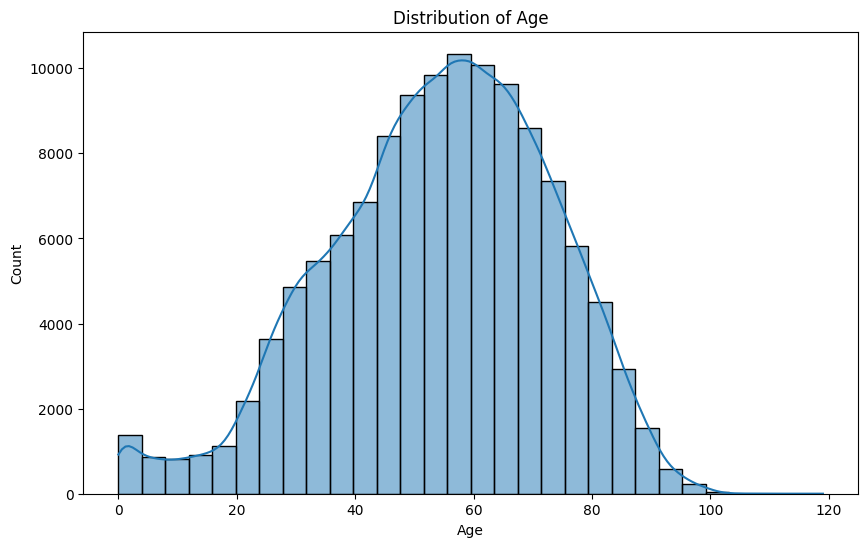

In [ ]:
print("-"*100)
print("1. UNIVARIATE ANALYSIS (Distribution of Single Variables)")
print("-"*100)

# Histogram for salary distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='AGE', bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()





Bivariate Analysis

<ipython-input-22-2313734330>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PATIENT_TYPE', y='AGE', order=order, palette='Set2')


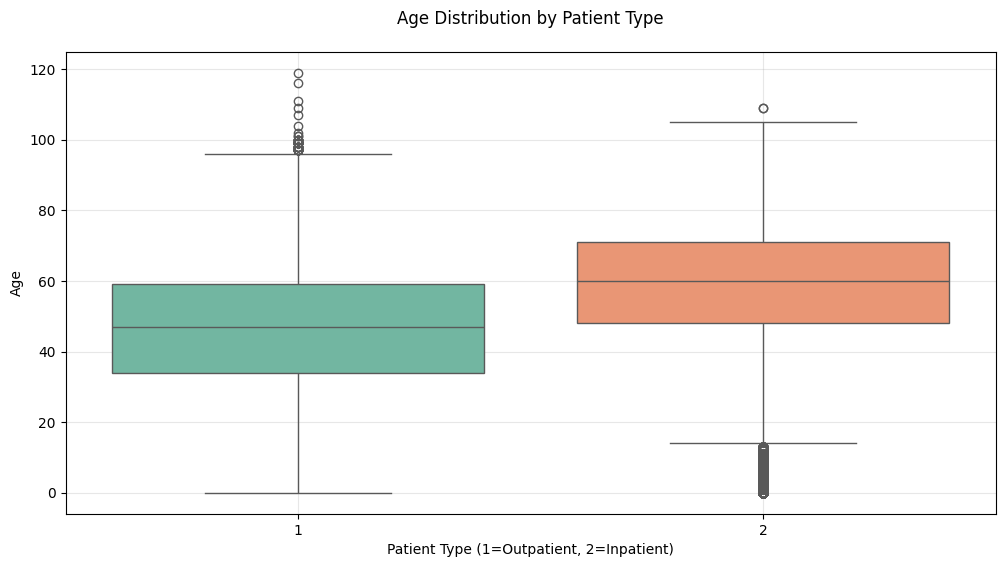

In [ ]:
plt.figure(figsize=(12, 6))
# Define order for Patient type
order = [1, 2]
# Create the boxplot: Age vs Patient type
sns.boxplot(data=df, x='PATIENT_TYPE', y='AGE', order=order, palette='Set2')

# Add title and labels
plt.title('Age Distribution by Patient Type', pad=20)
plt.xlabel('Patient Type (1=Outpatient, 2=Inpatient)')
plt.ylabel('Age')
plt.grid(True, alpha=0.3)
plt.show()


<ipython-input-30-3087215083>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ICU', y='AGE', order=order, palette='Set2')


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

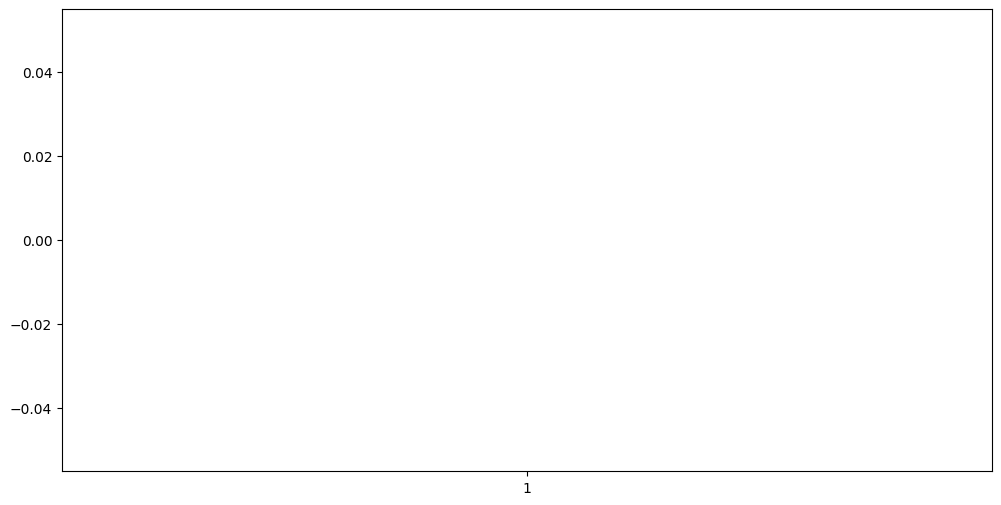

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Define order for ICU variable: 1 (Yes), 2 (No), 97 (Unknown)
order = [1, 2, 97]

# Create the boxplot: Age vs ICU
sns.boxplot(data=df, x='ICU', y='AGE', order=order, palette='Set2')

# Add title and labels
plt.title('Age Distribution by ICU Admission Status', pad=20)
plt.xlabel('ICU (1=Yes, 2=No, 97=Unknown)')
plt.ylabel('Age')
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

 Correlation Analysis

In [ ]:
plt.figure(figsize=(15, 10))
problem=['DIABETES','AGE', 'INTUBED', 'CARDIOVASCULAR', 'HIPERTENSION','OBESITY']
corr=df[problem].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', pad=20)
plt.show()

outlier

In [ ]:
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
df = df[(df['AGE'] >= lower) & (df['AGE'] <= upper)]
sns.boxplot(x=df['AGE'])
plt.title('Age Distribution after Outlier Removal')
plt.show()

In [ ]:
features = ['AGE', 'SEX', 'DIABETES', 'COPD', 'OBESITY', 'PNEUMONIA', 'CARDIOVASCULAR']
X = df[features]
y = df['ICU']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Modeling and Evaluating

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [ ]:
mse_age = mean_squared_error(y_test, y_pred)
r2_age = r2_score(y_test, y_pred)
print(f'MSE (AGE): {mse_age:.4f}, R²: {r2_age:.4f}')

#using hyperparameter tuning

setting up parameters

In [ ]:
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
print(f'Best Parameters: {random_search.best_params_}')

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

In [ ]:
# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

In [ ]:

# Predict
y_pred = best_model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Petal Width")
plt.title("Actual vs Predicted Petal Width (Tuned Ridge Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-29-2461201417>:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(age_data_by_icu, labels=icu_categories.values())


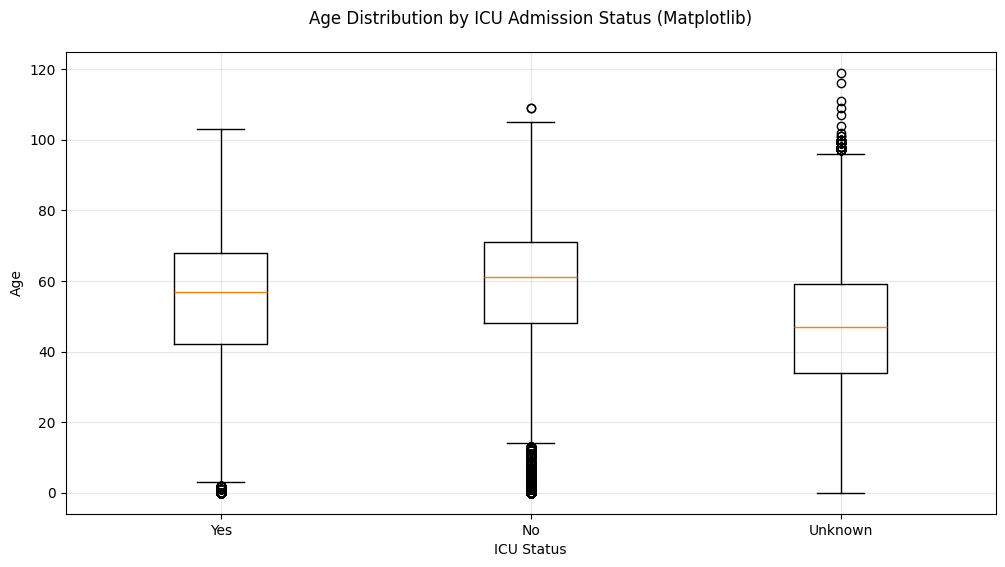

In [ ]:
import matplotlib.pyplot as plt

# Define the categories and their labels
icu_categories = {
    1: 'Yes',
    2: 'No',
    97: 'Unknown'
}

# Prepare data for matplotlib boxplots
age_data_by_icu = [df['AGE'][df['ICU'] == cat].dropna() for cat in icu_categories.keys()]

# Create the matplotlib boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(age_data_by_icu, labels=icu_categories.values())

# Add title and labels
plt.title('Age Distribution by ICU Admission Status (Matplotlib)', pad=20)
plt.xlabel('ICU Status')
plt.ylabel('Age')
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()